In [23]:
from ramCOH import functions as f
import ramCOH.processing as ram
import numpy as np
import matplotlib.pyplot as plt
import meltInc.plotStyle as ps

ps.layout(colors=ps.colors.vitaminC)

In [24]:
ol_file = "./olivine/PI081-05-04_2022_03_01_15_20_46_532nm_Edge_100�_x100_VIS_LWD_H150_1800 (450-850nm)_5s x 2_01.txt"
x, y = np.genfromtxt(ol_file, unpack=True)

In [25]:
olivine = ram.olivine(x, y)
olivine.baselineCorrect(olivine.birs, smooth_factor=1)
olivine.calculate_noise()
olivine.noise

18.346426175857115

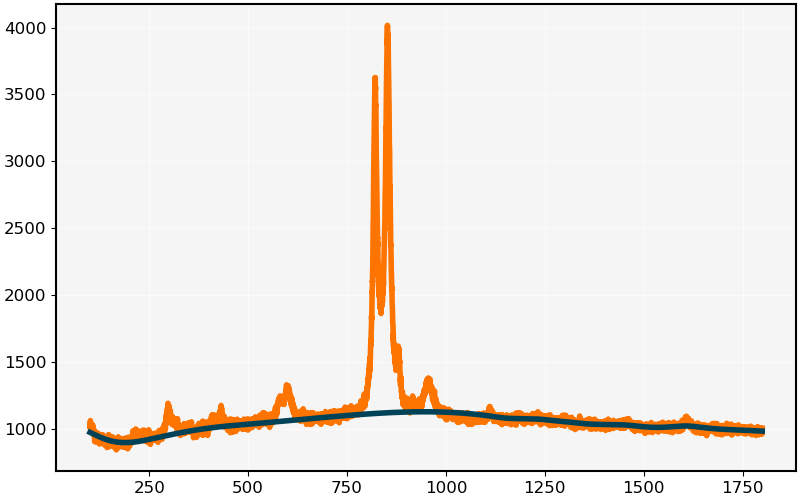

In [26]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(x, y)
plt.plot(x, olivine.baseline)

# plt.plot(olivine.x, olivine.intensities["BC"])

plt.show()

In [27]:
olivine.deconvolve(min_amplitude=4, min_peak_width=6, fit_window=4)

max y: 239.02393764661576, range [177.07567530963345, 367.7828405701234], threshold: 1.33286366203325
max y: 2893.7707720213775, range [408.9067884904115, 1064.2453624434868], threshold: 1.9200000000000004
max y: 71.18472855542336, range [1084.8534070774685, 1137.2665929225313], threshold: 1.2957435504967962


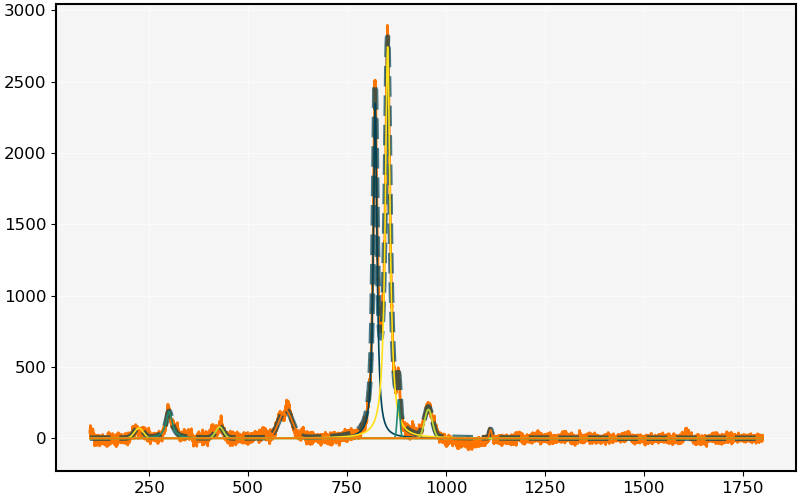

In [28]:
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(olivine.x, olivine.intensities["BC"], linewidth=2)
plt.plot(olivine.x, f.sum_GaussLorentz(olivine.x, *olivine.deconvolution_parameters), alpha=0.7, linestyle="dashed")
# plt.plot(x, spline)
for curve in olivine.deconvoluted_peaks:
    plt.plot(olivine.x, f.GaussLorentz(olivine.x, **curve), linewidth=1.2)
# plt.plot(xtrim, f.sum_GaussLorentz(xtrim, *params), linewidth=1)

In [29]:
olivine.deconvolution_parameters

[array([ 223.48307953,  300.15043084,  427.69386804,  594.53662766,
         821.08246409,  852.65740928,  880.30187789,  955.75261192,
        1112.89397421]),
 array([  71.50629306,  187.73901717,   79.7335574 ,  199.05211536,
        2349.18453917, 2743.51992512,  263.42862039,  202.50495651,
          58.92601322]),
 array([11.17783895,  9.47708611, 10.08208743, 16.70341345,  5.57006445,
         7.18827025,  3.49384875,  9.71888162,  2.82227432]),
 array([1.05645160e-18, 1.00000000e+00, 6.09704177e-15, 6.05707051e-02,
        9.52824755e-01, 1.00000000e+00, 2.74710845e-44, 3.00216367e-48,
        1.33576076e-29]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0.])]